In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample customer data
data = {
    'Age': [25, 34, 45, 23, 36, 50, 23, 43, 36, 50],
    'Annual Income (k$)': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)


In [13]:
# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the scaled data
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])


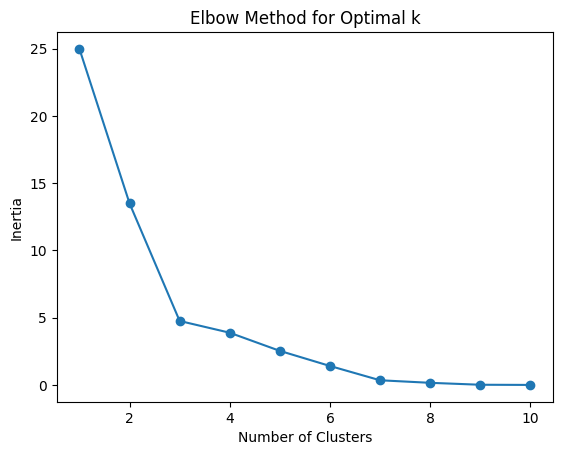

In [14]:
# Initialize a list to store the inertia values
inertia = []

# Test different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [15]:
# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(pca_df)

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = kmeans.labels_


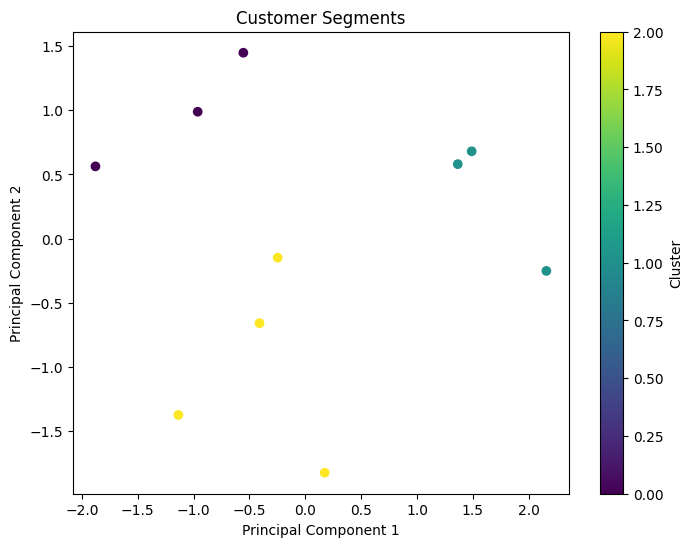

In [16]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
